In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('churn_prediction.csv')
df.head()
df['gender']=df['gender'].astype('category')
df.head()
df['occupation'].value_counts()
df.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [62]:
a=df['gender'].mode()
a
df['gender'].fillna(value=a[0],inplace=True)
df.head(20)
z=pd.get_dummies(df['gender'])
df=pd.concat([df,z],axis=1)
df.drop(['gender'],axis=1,inplace=True)
df['occupation'].value_counts()
b=df['occupation'].mode()
df['occupation'].fillna(value=b[0],inplace=True)
df.isnull().sum()


customer_id                          0
vintage                              0
age                                  0
dependents                        2463
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
Female                               0
Male                                 0
dtype: int64

In [63]:
df['city'].fillna(value=0,inplace=True)
c=df['city'].mean()
df['city'].fillna(value=c,inplace=True)


In [64]:
df['dependents'].fillna(value=0,inplace=True)
d=df['dependents'].mean()
df['dependents'].fillna(value=d,inplace=True)


In [66]:
df['days_since_last_transaction'].fillna(value=0,inplace=True)
d=df['days_since_last_transaction'].mean()
df['days_since_last_transaction'].fillna(value=d,inplace=True)


In [7]:
df.dtypes,df.nunique()
x=df.drop(['churn'],axis=1)
y=df['churn']

In [67]:
q=pd.get_dummies(df['occupation'])


In [68]:
df=pd.concat([df,q],axis=1)
df.drop(['occupation'],axis=1,inplace=True)

In [69]:
x=df.drop(['churn'],axis=1)
y=df['churn']



In [70]:
from sklearn.model_selection import train_test_split as tt
train_x,val_x,train_y,val_y=tt(x,y,random_state=101,stratify=y)

In [71]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(random_state=101)
lr.fit(train_x,train_y)
lr.score(train_x,train_y)
predict=lr.predict(train_x)

In [72]:
lr.score(val_x,val_y)

0.8256764374295378

In [73]:
from sklearn.neighbors import KNeighborsClassifier as KNN
l=[]
for i in range(1,20):
    knn=KNN(n_neighbors=i)
    knn.fit(train_x,train_y)
    l.append(knn.score(val_x,val_y))

In [74]:
score=pd.DataFrame({'range':range(1,20),'knn_score':l})
score

,range,knn_score
0,1,0.791714
1,2,0.830750
2,3,0.826099
3,4,0.839064
4,5,0.841883
5,6,0.840474
6,7,0.843574
7,8,0.840614
8,9,0.841601
9,10,0.842869


In [211]:
knn=KNN(n_neighbors=14)
knn.fit(train_x,train_y)
knn.score(val_x,val_y)


0.8437147688838782

In [212]:
predict2=knn.predict(val_x)

In [213]:
knn.score(train_x,train_y)


0.8544583294183971

In [77]:
from sklearn.tree import DecisionTreeClassifier 
ll=[]
for i in range(1,20):
    dd=DecisionTreeClassifier(max_depth=i)
    dd.fit(train_x,train_y)
    ll.append(dd.score(val_x,val_y))
    
    
    

In [78]:
score1=pd.DataFrame({'range':range(1,20),'decision_score':ll})
score1.head()


,range,decision_score
0,1,0.847943
1,2,0.847943
2,3,0.852029
3,4,0.856539
4,5,0.858794


In [183]:
dd=DecisionTreeClassifier(max_depth=5)
dd.fit(train_x,train_y)
predict3=dd.predict(val_x)
dd.score(val_x,val_y)

0.858793686583991

In [80]:
dd.score(train_x,train_y)

0.862679695574556

In [81]:
df.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,Female,Male,company,retired,salaried,self_employed,student
customer_id,1.000000,-0.006093,-0.000442,-0.009110,0.000908,0.009618,-0.000286,0.009579,0.006589,0.005819,...,0.005140,0.004553,-0.002723,0.004629,-0.004629,0.004593,-0.004209,0.002557,0.001260,-0.003035
vintage,-0.006093,1.000000,0.227390,0.068588,0.047667,-0.167366,-0.380714,-0.078002,0.002986,0.004518,...,0.001638,0.003448,-0.064637,-0.039276,0.039276,0.035027,0.057813,0.041924,-0.013189,-0.106399
age,-0.000442,0.227390,1.000000,0.001261,0.016692,-0.076532,-0.058990,-0.010413,0.054346,0.058342,...,0.057662,0.060297,-0.020012,-0.089528,0.089528,0.045605,0.372942,-0.129008,0.153136,-0.452218
dependents,-0.009110,0.068588,0.001261,1.000000,0.004801,0.007917,-0.001704,-0.061647,-0.003838,-0.002181,...,-0.002769,-0.001672,0.029335,-0.176027,0.176027,-0.004590,-0.054831,0.044848,0.037310,-0.088262
city,0.000908,0.047667,0.016692,0.004801,1.000000,-0.003352,-0.071830,-0.004227,-0.003366,-0.001974,...,-0.003524,-0.003834,-0.003783,0.001935,-0.001935,-0.002081,-0.004601,0.002869,0.000438,-0.000654
customer_nw_category,0.009618,-0.167366,-0.076532,0.007917,-0.003352,1.000000,0.235059,0.041783,-0.058314,-0.059854,...,-0.058648,-0.059113,0.006551,-0.042773,0.042773,0.002814,0.011718,0.040449,-0.021901,-0.037264
branch_code,-0.000286,-0.380714,-0.058990,-0.001704,-0.071830,0.235059,1.000000,0.044414,0.000181,0.000214,...,0.001031,0.002080,0.035469,-0.068892,0.068892,-0.008184,-0.004395,-0.033180,0.053324,-0.039988
days_since_last_transaction,0.009579,-0.078002,-0.010413,-0.061647,-0.004227,0.041783,0.044414,1.000000,-0.015868,-0.010703,...,-0.013774,-0.008291,-0.029452,0.058395,-0.058395,-0.000367,-0.006471,-0.034140,0.014036,0.036102
current_balance,0.006589,0.002986,0.054346,-0.003838,-0.003366,-0.058314,0.000181,-0.015868,1.000000,0.947276,...,0.983412,0.942207,-0.024181,-0.017821,0.017821,0.000772,-0.006112,0.000760,0.012773,-0.019217
previous_month_end_balance,0.005819,0.004518,0.058342,-0.002181,-0.001974,-0.059854,0.000214,-0.010703,0.947276,1.000000,...,0.974714,0.969605,0.006886,-0.019206,0.019206,-0.001113,-0.005698,-0.001456,0.014918,-0.019741


In [82]:
df[['previous_month_balance','current_month_balance']]


,previous_month_balance,current_month_balance
0,1458.71,1458.71
1,8787.61,6496.78
2,5070.14,5006.28
3,1669.79,2291.91
4,1677.16,1157.15
...,...,...
28377,1076.43,1076.43
28378,3690.32,3738.54
28379,57564.24,61078.50
28380,1625.55,1625.55


In [83]:
month_balance=pd.DataFrame({'residual_month_balance':df['previous_month_balance']-df['current_month_balance']})
month_balance['residual_month_balance'].value_counts()

 0.00       4081
 2.37         14
-138.25       10
 2.38          8
 138.25        7
            ... 
-1474.65       1
-1332.49       1
 405.34        1
 677.34        1
-65.44         1
Name: residual_month_balance, Length: 23489, dtype: int64

In [84]:
balance0=month_balance[month_balance['residual_month_balance']==0.00]
balance0

,residual_month_balance
0,0.0
25,0.0
32,0.0
34,0.0
37,0.0
...,...
28363,0.0
28374,0.0
28376,0.0
28377,0.0


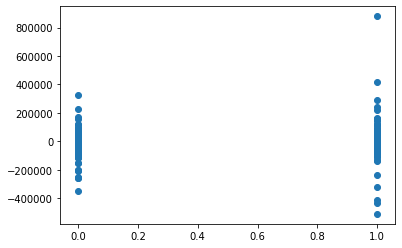

In [85]:
plt.scatter(df['churn'],month_balance)

In [86]:
lr.coef_

array([[-1.89112785e-05, -2.46769356e-04, -3.16596521e-05,
         1.87079384e-07, -3.83669929e-04, -1.51687973e-06,
        -2.14114410e-04, -9.06313647e-05, -1.73683912e-04,
        -7.18217247e-06,  1.88176736e-04, -9.61112224e-06,
        -6.94901217e-06, -4.27590263e-06,  1.14615127e-05,
         5.77041759e-06, -1.24566516e-05, -2.52416497e-05,
        -4.90584195e-07, -2.06085448e-07, -4.65832682e-09,
        -1.01742253e-07, -2.30468804e-07, -1.97777432e-07,
        -1.62022827e-07]])

<BarContainer object of 25 artists>

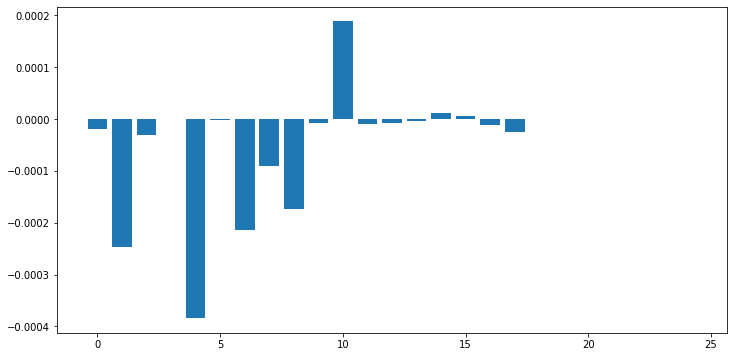

In [87]:
coef_x=range(len(train_x.columns))
coef=lr.coef_.reshape(-1)
coef.reshape
plt.figure(figsize=(12,6),facecolor='w')
plt.bar(coef_x,coef)

In [88]:
coefficient=pd.DataFrame({'columns':train_x.columns,'coef':lr.coef_.reshape(-1)})
coefficient

,columns,coef
0,customer_id,-1.891128e-05
1,vintage,-2.467694e-04
2,age,-3.165965e-05
3,dependents,1.870794e-07
4,city,-3.836699e-04
5,customer_nw_category,-1.516880e-06
6,branch_code,-2.141144e-04
7,days_since_last_transaction,-9.063136e-05
8,current_balance,-1.736839e-04
9,previous_month_end_balance,-7.182172e-06


In [134]:
scaled=coefficient[coefficient['coef']>0.000123]
df1=df[scaled['columns'].values]

In [135]:
from sklearn.model_selection import train_test_split as tt
train_x,val_x,train_y,val_y=tt(df1,y,random_state=101,stratify=y)

In [136]:
from sklearn.linear_model import LogisticRegression
ll=LogisticRegression()
ll.fit(train_x,train_y)
ll.score(train_x,train_y)

0.8146199379874096

In [137]:
predict=ll.predict(val_x)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
ll.score(val_x,val_y)

0.814684329199549

In [140]:
from sklearn.model_selection import train_test_split as tt
train_x,val_x,train_y,test_y=tt(x,y,random_state=101,stratify=y)

In [142]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
lr.score(train_x,train_y)

0.8265526637226346

In [194]:
predict11=lr.predict_proba(val_x)
predict11
pre=lr.predict(val_x)
predict1=lr.predict(val_x)

In [155]:
pd.Series(pre).value_counts()

0    6930
1     166
dtype: int64

In [217]:
l=np.array([])
demo1=predict11[:,1]

for i in range(len(val_x)):
    if demo1[i]>0.41:
        l=np.append(l,1)
    else:
        l=np.append(l,0)

        
from sklearn.metrics import accuracy_score as aa
aa(l,val_y)

0.8301860202931229

In [200]:
predict1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [203]:
predict2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [204]:
predict3

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [218]:
from statistics import mode
final=np.array([])
for i in range(len(val_x)):
    final=np.append(final,mode([l[i],predict2[i],predict3[i]]))

In [219]:
from sklearn. metrics import accuracy_score as aa
aa(val_y,final)

0.8483652762119503

In [223]:
from statistics import mode
final=np.array([])
for i in range(len(val_x)):
    final=np.append(final,mode([predict[i],predict2[i],predict3[i]]))

In [1]:
from sklearn. metrics import accuracy_score as aa
aa(val_y,final)

NameError: name 'val_y' is not defined